In [1]:
import pandas as pd


In [2]:
train = pd.read_csv('spatiotemporal/spatiotemporal_trn_data.csv')
targets = pd.read_csv('spatiotemporal/spatiotemporal_trn_targets.csv', header=None)
test = pd.read_csv('spatiotemporal/spatiotemporal_tst_data.csv')

C:\Users\Krishnendu\AppData\Local\Temp\ipykernel_11940\329104888.py:1: DtypeWarning: Columns (8,11,13,18,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('spatiotemporal/spatiotemporal_trn_data.csv')
C:\Users\Krishnendu\AppData\Local\Temp\ipykernel_11940\329104888.py:3: DtypeWarning: Columns (8,11,13,18) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv('spatiotemporal/spatiotemporal_tst_data.csv')


In [3]:
# drop columns STATION and NAME
train = train.drop(columns=['DATE','STATION', 'NAME', 'REPORT_TYPE', 'SOURCE', 'HourlySkyConditions', 'REM'])

In [4]:
# join targets to train
train = train.join(targets)

In [5]:
#drop column name 0
train = train.drop(columns=[0])

#rename column 1 to target
train = train.rename(columns={1: 'target'})

In [6]:
# drop columns with more than 50% missing values
train = train.dropna(thresh=train.shape[0]*2/4, axis=1)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934807 entries, 0 to 934806
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LATITUDE                   934807 non-null  float64
 1   LONGITUDE                  934807 non-null  float64
 2   ELEVATION                  934807 non-null  float64
 3   HourlyDewPointTemperature  916829 non-null  object 
 4   HourlyDryBulbTemperature   923010 non-null  object 
 5   HourlyPressureTendency     586427 non-null  float64
 6   HourlyRelativeHumidity     916208 non-null  float64
 7   HourlySeaLevelPressure     670809 non-null  object 
 8   HourlyWindDirection        925461 non-null  object 
 9   HourlyWindSpeed            924185 non-null  object 
 10  target                     934807 non-null  object 
dtypes: float64(5), object(6)
memory usage: 78.5+ MB


In [8]:
train.HourlyDewPointTemperature = pd.to_numeric(train.HourlyDewPointTemperature, errors='coerce').astype(float)
train.HourlyDryBulbTemperature = pd.to_numeric(train.HourlyDryBulbTemperature, errors='coerce').astype(float)
train.HourlySeaLevelPressure = pd.to_numeric(train.HourlySeaLevelPressure, errors='coerce').astype(float)
train.HourlyWindDirection = pd.to_numeric(train.HourlyWindDirection, errors='coerce').astype(float)
train.HourlyWindSpeed = pd.to_numeric(train.HourlyWindSpeed, errors='coerce').astype(float)
train.target = pd.to_numeric(train.target, errors='coerce').astype(float)


In [9]:
#drop rows with missing values
train = train.dropna()

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520877 entries, 0 to 934804
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LATITUDE                   520877 non-null  float64
 1   LONGITUDE                  520877 non-null  float64
 2   ELEVATION                  520877 non-null  float64
 3   HourlyDewPointTemperature  520877 non-null  float64
 4   HourlyDryBulbTemperature   520877 non-null  float64
 5   HourlyPressureTendency     520877 non-null  float64
 6   HourlyRelativeHumidity     520877 non-null  float64
 7   HourlySeaLevelPressure     520877 non-null  float64
 8   HourlyWindDirection        520877 non-null  float64
 9   HourlyWindSpeed            520877 non-null  float64
 10  target                     520877 non-null  float64
dtypes: float64(11)
memory usage: 47.7 MB


In [11]:
# DROP ALL ROWS with valueo f 9999.9 in any column
train = train[(train != 9999.9).all(1)]

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520877 entries, 0 to 934804
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LATITUDE                   520877 non-null  float64
 1   LONGITUDE                  520877 non-null  float64
 2   ELEVATION                  520877 non-null  float64
 3   HourlyDewPointTemperature  520877 non-null  float64
 4   HourlyDryBulbTemperature   520877 non-null  float64
 5   HourlyPressureTendency     520877 non-null  float64
 6   HourlyRelativeHumidity     520877 non-null  float64
 7   HourlySeaLevelPressure     520877 non-null  float64
 8   HourlyWindDirection        520877 non-null  float64
 9   HourlyWindSpeed            520877 non-null  float64
 10  target                     520877 non-null  float64
dtypes: float64(11)
memory usage: 47.7 MB


## find outliers

In [13]:
#find std dev for each column
train.std()

LATITUDE                       1.557591
LONGITUDE                      5.575551
ELEVATION                     96.573943
HourlyDewPointTemperature     13.999327
HourlyDryBulbTemperature      13.673785
HourlyPressureTendency         0.398862
HourlyRelativeHumidity        24.010487
HourlySeaLevelPressure         0.210818
HourlyWindDirection          129.236812
HourlyWindSpeed                4.022862
target                         3.005190
dtype: float64

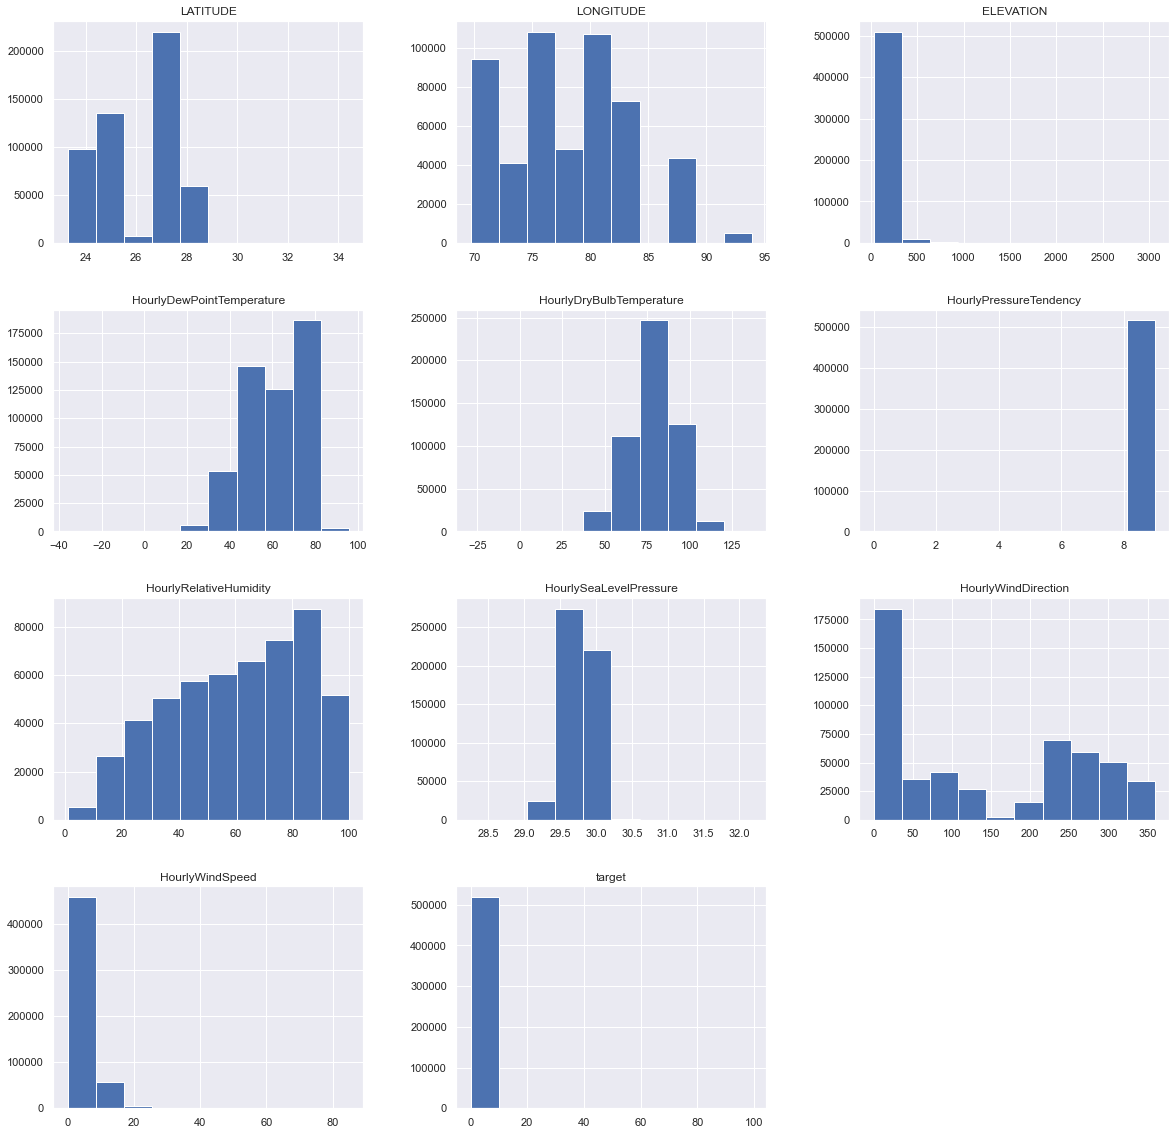

In [14]:
#plot distribution of each column
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

train.hist(figsize=(20,20))
plt.show()

In [15]:
import numpy as np

In [16]:
def remove_outliers(series):
    mean = series.mean()
    std = series.std()
    cut_off = std * 2
    lower, upper = mean - cut_off, mean + cut_off
    #replace outlier values with NaN
    series[series < lower] = np.nan
    series[series > upper] = np.nan
    return series

In [17]:
train.HourlyDewPointTemperature = remove_outliers(train.HourlyDewPointTemperature)
train.HourlyDryBulbTemperature = remove_outliers(train.HourlyDryBulbTemperature)
train.HourlyWindDirection = remove_outliers(train.HourlyWindDirection)
train.HourlyWindSpeed = remove_outliers(train.HourlyWindSpeed)
train.target = remove_outliers(train.target)

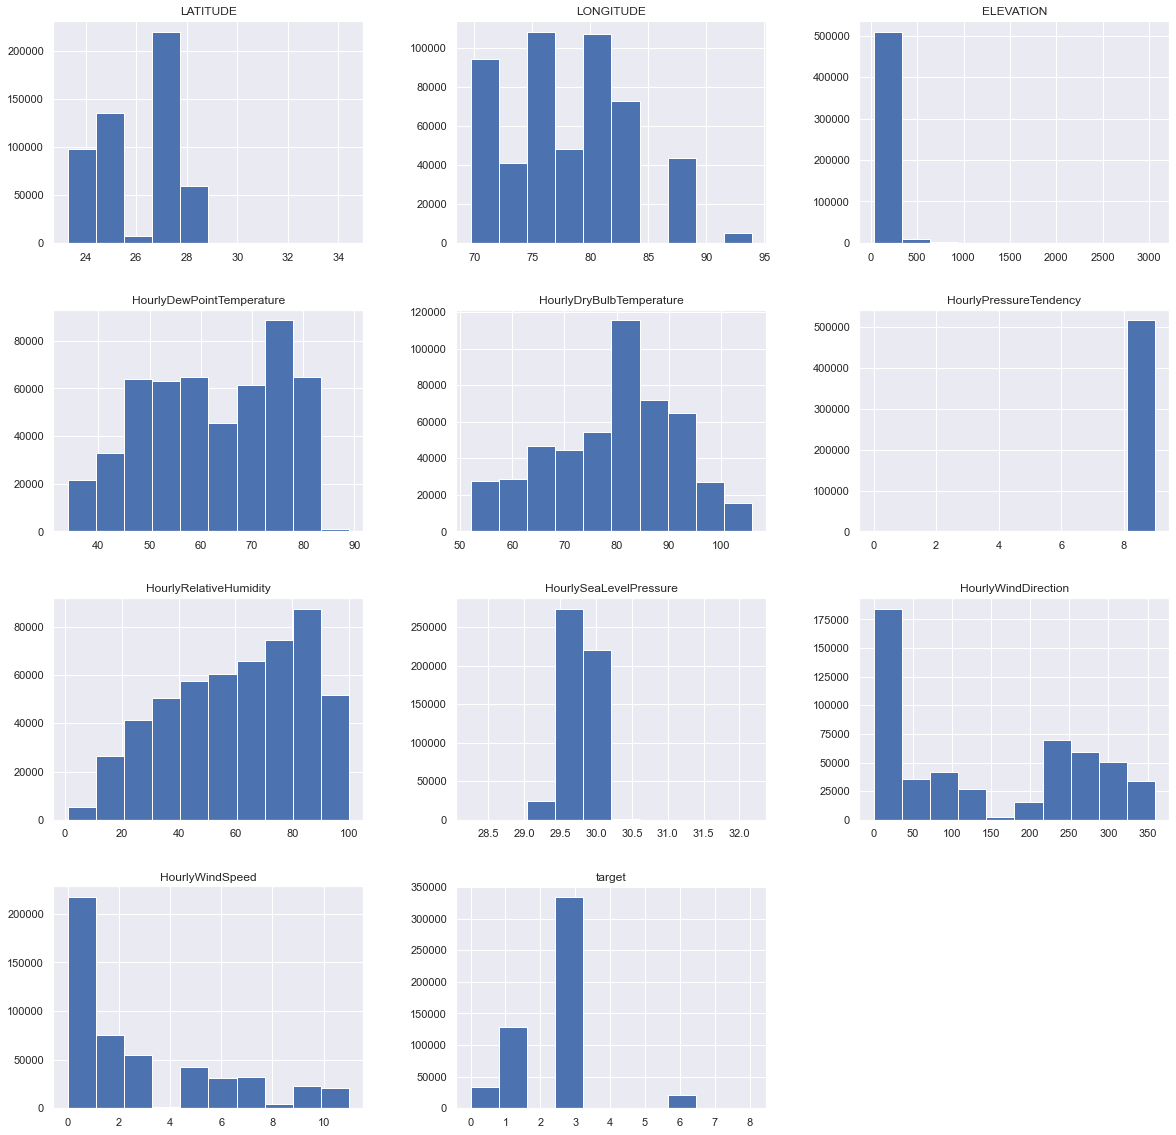

In [18]:
#plot distribution of each column
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

train.hist(figsize=(20,20))
plt.show()

In [19]:
train.dropna(inplace=True)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467821 entries, 0 to 934804
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LATITUDE                   467821 non-null  float64
 1   LONGITUDE                  467821 non-null  float64
 2   ELEVATION                  467821 non-null  float64
 3   HourlyDewPointTemperature  467821 non-null  float64
 4   HourlyDryBulbTemperature   467821 non-null  float64
 5   HourlyPressureTendency     467821 non-null  float64
 6   HourlyRelativeHumidity     467821 non-null  float64
 7   HourlySeaLevelPressure     467821 non-null  float64
 8   HourlyWindDirection        467821 non-null  float64
 9   HourlyWindSpeed            467821 non-null  float64
 10  target                     467821 non-null  float64
dtypes: float64(11)
memory usage: 42.8 MB


In [21]:
train.to_csv('spatiotemporal/spatiotemporal_trn_data_clean.csv', index=False)

In [22]:
#use scikit learn to split data into train and test
from sklearn.model_selection import train_test_split

#use train test split to get x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = train_test_split(train.drop('target', axis=1), train['target'], test_size=0.1, random_state=101)



In [23]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421038 entries, 396869 to 353480
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LATITUDE                   421038 non-null  float64
 1   LONGITUDE                  421038 non-null  float64
 2   ELEVATION                  421038 non-null  float64
 3   HourlyDewPointTemperature  421038 non-null  float64
 4   HourlyDryBulbTemperature   421038 non-null  float64
 5   HourlyPressureTendency     421038 non-null  float64
 6   HourlyRelativeHumidity     421038 non-null  float64
 7   HourlySeaLevelPressure     421038 non-null  float64
 8   HourlyWindDirection        421038 non-null  float64
 9   HourlyWindSpeed            421038 non-null  float64
dtypes: float64(10)
memory usage: 35.3 MB


In [24]:
#use scikit learn to scale data
from sklearn.preprocessing import StandardScaler

#scale
scaler = StandardScaler()
scaler.fit(x_train)
scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

#scale y also
scaler_y = StandardScaler()
scaler_y.fit(y_train.values.reshape(-1, 1))
scaled_y_train = scaler_y.transform(y_train.values.reshape(-1, 1))
scaled_y_test = scaler_y.transform(y_test.values.reshape(-1, 1))


In [25]:
scaled_x_train[0]

array([ 0.56658422,  0.48321297, -0.2773875 ,  1.52051008,  0.63825726,
        0.06144969,  0.9694372 , -0.50836632, -0.20954451,  1.29862302])

In [26]:
scaled_y_train.shape

(421038, 1)

In [27]:
#check for Nan values
import numpy as np
np.any(np.isnan(scaled_x_train))

False

In [28]:
#use linear regression
from sklearn.linear_model import LinearRegression

#instantiate model
model = LinearRegression()

#fit model
model.fit(scaled_x_train, scaled_y_train)

#predict
predictions = model.predict(scaled_x_test)

#evaluate model
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

mean_squared_error(scaled_y_test,predictions)


0.7466674726160318

In [29]:

mean_absolute_error(scaled_y_test,predictions)

0.573022042517675

In [30]:
model.score(scaled_x_test, scaled_y_test)

0.2689817461824743

In [31]:
#use ridge regressionm
from sklearn.linear_model import Ridge

#instantiate model

model = Ridge(alpha=0.5)

#fit model
model.fit(scaled_x_train, scaled_y_train)

#predict
predictions = model.predict(scaled_x_test)

#evaluate model
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

mean_squared_error(scaled_y_test,predictions)


0.74666748796906

In [32]:
mean_absolute_error(scaled_y_test,predictions)

0.5730221291809744

In [33]:
model.score(scaled_x_test, scaled_y_test)

0.2689817311512265

In [73]:
#use lasso regression
from sklearn.linear_model import Lasso

#instantiate model
model = Lasso(alpha=0.1)

#fit model
model.fit(scaled_x_train, scaled_y_train)

#predict
predictions = model.predict(scaled_x_test)

#evaluate model
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

mean_squared_error(scaled_y_test,predictions)

0.7887157820029713

In [74]:
mean_absolute_error(scaled_y_test,predictions)

0.5679583860076493

In [75]:
model.score(scaled_x_test, scaled_y_test)

0.22781471690727984

In [37]:
#use MLP regressor
from sklearn.neural_network import MLPRegressor

#instantiate model
model = MLPRegressor(hidden_layer_sizes=(13,13,13),max_iter=1000)




#fit model

model.fit(scaled_x_train, scaled_y_train.ravel())

#predict
predictions = model.predict(scaled_x_test)

In [38]:
#evaluate model
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

mean_squared_error(scaled_y_test,predictions)

0.5594302584621244

In [39]:
mean_absolute_error(scaled_y_test,predictions)


0.44896936122285674

In [40]:
explained_variance_score(scaled_y_test,predictions)

0.45341889346634523

In [44]:
model.score(scaled_x_test, scaled_y_test)

0.45229470189607324

In [41]:
import matplotlib.pyplot as plt

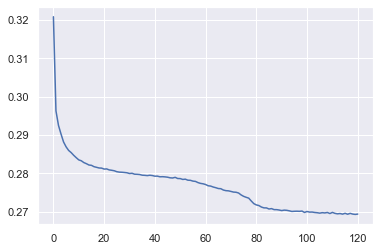

In [42]:
plt.plot(model.loss_curve_)


In [43]:
#model score
model.score(scaled_x_test, scaled_y_test)

0.45229470189607324

In [47]:
#use ridge regressionm
from sklearn.neighbors import KNeighborsRegressor

#instantiate model

model = KNeighborsRegressor()

#fit model
model.fit(scaled_x_train, scaled_y_train)

#predict
predictions = model.predict(scaled_x_test)

#evaluate model
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

mean_squared_error(scaled_y_test,predictions)

0.6320800986295633

In [49]:
model.score(scaled_x_test, scaled_y_test)

0.38116751175177443

In [50]:
mean_absolute_error(scaled_y_test,predictions)


0.4465831472573327

In [57]:
#use ridge regressionm
from sklearn.kernel_ridge import KernelRidge

#instantiate model

model = KernelRidge()

#fit model
model.fit(scaled_x_train, scaled_y_train)

#predict
predictions = model.predict(scaled_x_test)

#evaluate model
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

mean_squared_error(scaled_y_test,predictions)

MemoryError: Unable to allocate 1.29 TiB for an array with shape (421038, 421038) and data type float64

In [55]:
model.score(scaled_x_test, scaled_y_test)

0.2689810097986507

In [56]:
mean_absolute_error(scaled_y_test,predictions)

0.5730261748763181